# Exploratory Data Analysis of Salaries Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import altair as alt

from sklearn.model_selection import train_test_split

alt.data_transformers.disable_max_rows()
alt.data_transformers.enable("data_server")

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-18/survey.csv"
)

## Introduction

- The goal of this project is to utilise the salaries survey dataset in order to create a predictive model which we can use to predict an individual's annual salary, based on factors about their employment such as industry, job title, city, age, etc. 
- For this exploratory stage, we want to better understand the dataset itself, and try to identify any salient trends and patterns from the data
- We also want to understand what data wrangling steps will be required, such as removal of columns/rows, transformation of data, or future preprocessing steps for predictive modelling. 

### The Dataset

- The dataset we are analysing comes from a salary survey from the "Ask a Manager" blog by Alison Green. This dataset contains survey data gathered from "Ask a Manager" readers working in a variety of industries, and can be found [here](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-05-18/survey.csv).
- The dataset involves over 24,000 responses about salaries, in response to a survey which was published on a blog
- The notable caveat about the data is that it may not be a good representation of the general population, but is rather representative of the population of individuals who are both readers of the Ask a Manager blog, and who opted to respond to the survey, and this is evident in the exploration of demographic patterns in the dataset.

In [3]:
df['currency'].value_counts()

USD        21852
CAD         1564
GBP         1521
EUR          585
AUD/NZD      469
Other        133
CHF           35
SEK           34
JPY           22
ZAR           13
HKD            4
Name: currency, dtype: int64

In [4]:
df['country'].value_counts()

United States                                            9010
USA                                                      7918
US                                                       2485
Canada                                                   1543
United Kingdom                                            584
                                                         ... 
Sri lanka                                                   1
Kuwait                                                      1
Eritrea                                                     1
For the United States government, but posted overseas       1
france                                                      1
Name: country, Length: 294, dtype: int64

In [5]:
# drop currency and country columns
df_dropcurrency = df[df["currency"] == "USD"].drop(
    columns=["currency", "currency_other"]
)
df_dropcountry = df_dropcurrency[
    df_dropcurrency["country"]
    .str.lower()
    .isin(
        [
            "us",
            "usa",
            "u.s.",
            "u.s.a",
            "united states",
            "america",
            "united states of america",
        ]
    )
].drop(columns=["country"])

# split the data before EDA
train_df, test_df = train_test_split(df_dropcountry, test_size=0.3, random_state=123)
train_df

,timestamp,how_old_are_you,industry,job_title,additional_context_on_job_title,annual_salary,other_monetary_comp,additional_context_on_income,state,city,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,race
25503,5/6/2021 17:40:05,45-54,"Accounting, Banking & Finance",CPA,NaN,90000,10000.0,NaN,California,Palm Springs,21 - 30 years,8 - 10 years,Master's degree,Woman,White
12591,4/28/2021 10:18:04,45-54,Engineering or Manufacturing,Sales Analyst 1,I calculate commissions for our sales team,82702,2700.0,NaN,Pennsylvania,Pittsburgh,21 - 30 years,5-7 years,College degree,Woman,White
22381,4/30/2021 19:35:01,25-34,Education (Higher Education),Director of Enrollment,NaN,75000,0.0,NaN,Colorado,Fort Collins,11 - 20 years,8 - 10 years,Master's degree,Woman,White
3627,4/27/2021 12:11:54,45-54,Engineering or Manufacturing,Process Analyst,NaN,135000,5000.0,NaN,Virginia,Arlington,21 - 30 years,11 - 20 years,Some college,Woman,White
14683,4/28/2021 15:14:53,25-34,Computing or Tech,Senior Data Scientist,NaN,154000,145000.0,Bonus plus RSUs,Colorado,Boulder,8 - 10 years,5-7 years,PhD,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,4/27/2021 17:18:59,25-34,Media & Digital,Reporter,NaN,50000,0.0,NaN,Texas,San Antonio,8 - 10 years,5-7 years,College degree,Woman,White
18773,4/29/2021 2:47:37,25-34,Computing or Tech,Product Manager,NaN,125000,NaN,NaN,Washington,Seattle,2 - 4 years,2 - 4 years,College degree,Woman,Asian or Asian American
21751,4/30/2021 16:22:13,25-34,Recruitment or HR,Talent Acquisition Manager,NaN,80000,NaN,NaN,Pennsylvania,Allentown,11 - 20 years,8 - 10 years,College degree,Woman,White
19375,4/29/2021 9:17:37,25-34,Computing or Tech,International Partner Marketing Manager,NaN,80000,8000.0,NaN,Massachusetts,Boston,2 - 4 years,2 - 4 years,College degree,Woman,White


- Through exploratory data analysis, we noticed that our data are mostly from the USA and most of the currency is USD (more than 80%). Given that we do not have large enough data for other countries and it is hard to convert currency (so that the salaries are on the same scale), we decide to limit the scope of our predictions to the area for which we have the most data, which is USA.
- In order to do so, we also had to catch various different variations of "United States".

## Summary Information

- First we get some general information about our dataset.
- Note that there are lots of null values in the additional information (additional_context_on_job_title, additional_context_on_income, etc).

In [36]:
def df_uniques(df):
    result = {}
    for x in df.columns:
        result[df[x].name] = df[x].unique().tolist()[0:5]
    return result


result = {}
print("Summary Table")
result["Not Null Count"] = train_df.notnull().sum()
result["Null Count"] = train_df.isnull().sum()
result["Number of Unique Values"] = train_df.nunique()
result["Unique Values"] = df_uniques(train_df)
result["Types"] = train_df.dtypes
result_df = pd.DataFrame(result)
result_df

Summary Table


,Not Null Count,Null Count,Number of Unique Values,Unique Values,Types
timestamp,15037,0,14011,"[5/6/2021 17:40:05, 4/28/2021 10:18:04, 4/30/2...",object
how_old_are_you,15037,0,7,"[45-54, 25-34, 35-44, 55-64, 65 or over]",object
industry,15008,29,675,"[Accounting, Banking & Finance, Engineering or...",object
job_title,15037,0,7970,"[CPA, Sales Analyst 1, Director of Enrollment,...",object
additional_context_on_job_title,3971,11066,3861,"[nan, I calculate commissions for our sales te...",object
annual_salary,15037,0,2199,"[90000, 82702, 75000, 135000, 154000]",int64
other_monetary_comp,11282,3755,583,"[10000.0, 2700.0, 0.0, 5000.0, 145000.0]",float64
additional_context_on_income,1649,13388,1624,"[nan, Bonus plus RSUs, Crappy benefits, I beli...",object
state,14914,123,108,"[California, Pennsylvania, Colorado, Virginia,...",object
city,15006,31,2482,"[Palm Springs, Pittsburgh, Fort Collins, Arlin...",object


In [7]:
train_df.describe()

,annual_salary,other_monetary_comp
count,1.503700e+04,1.128200e+04
mean,9.186154e+04,1.261578e+04
std,6.435872e+04,4.354402e+04
min,0.000000e+00,0.000000e+00
25%,5.700000e+04,0.000000e+00
50%,7.900000e+04,2.000000e+03
75%,1.120000e+05,1.000000e+04
max,3.000000e+06,1.400000e+06


### Target Column

In [8]:
train_df['annual_salary'].describe()

count    1.503700e+04
mean     9.186154e+04
std      6.435872e+04
min      0.000000e+00
25%      5.700000e+04
50%      7.900000e+04
75%      1.120000e+05
max      3.000000e+06
Name: annual_salary, dtype: float64

In [9]:
train_df['annual_salary'].value_counts()

70000     307
60000     307
75000     303
80000     302
65000     298
         ... 
101209      1
103736      1
80800       1
79480       1
31999       1
Name: annual_salary, Length: 2199, dtype: int64

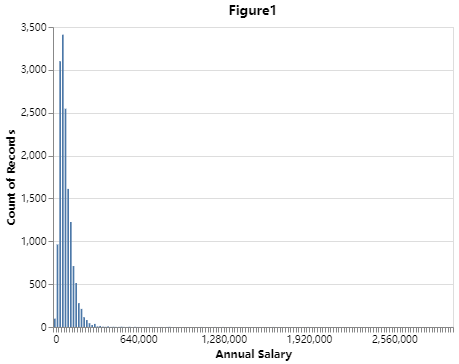

In [20]:
alt.Chart(train_df, title="Figure 1").mark_bar().encode(
    alt.X("annual_salary", bin=alt.Bin(maxbins=200), title = "Annual Salary"),
    y='count()')

- Here is the distribution of our target "annual_salary". As shown in the graph below, it seems to be a largely right skewed distribution.
- According to the descriptive statistics, the mean salary is around \$90,000 with the range going from  to 3,000,000. 
    - On this issue, we may need to consider some data cleaning process to deal with these outliers, especially the salary values at $0

In [11]:
sum(train_df['annual_salary'] == 0)

8

There are 8 values in the dataset where annual salary = $0. 

## Numeric columns

- We have only one numeric column except the target column, and we use histogram to explore its distribution. We also use scatter plot to explore its relationships with the annual salary.

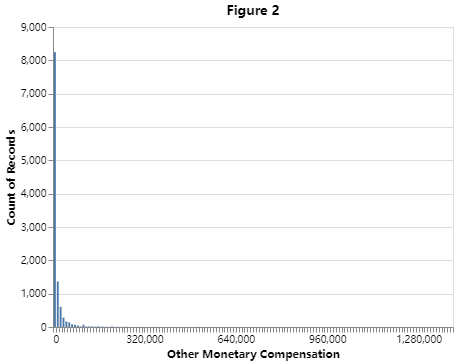

In [21]:
alt.Chart(train_df, title="Figure 2").mark_bar().encode(
    alt.X("other_monetary_comp", bin=alt.Bin(maxbins=200), title = "Other Monetary Compensation"),
    y='count()')

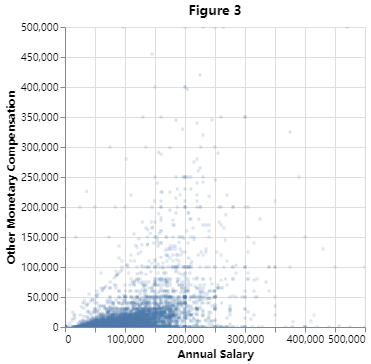

In [22]:
alt.Chart(train_df, title="Figure 3").mark_point(opacity=0.2, size=2, clip=True).encode(
     alt.X("annual_salary",scale=alt.Scale(domain=(0, 500000)), title = "Annual Salary"),
     alt.Y('other_monetary_comp',scale=alt.Scale(domain=(0, 500000)), title = "Other Monetary Compensation")
).properties(
    width=300,
    height=300
)

- It seems there is a positive correlation between other_monetary_comp and annual_salary, which make sense.
- However, since this column involves 'other monetary compensation', it is worth considering whether we should even use this column when making predictions, seeing as we wouldn't have this data when the very thing we are trying to predict is salaries

## Categorical Columns

- For variables like job title or city that have too many unique values, we will later perform transformations on it.
- Here we want to explore those variables that have <20 unique values and check their distributions and relationships with the annual salary, since variables with 100s or 1000s of distinct values would be harder to visualise in a meaningful way. 

In [14]:
col = result_df[result_df["Number of Unique Values"] < 20]
collist = col.index.tolist()
collist

['how_old_are_you',
 'overall_years_of_professional_experience',
 'years_of_experience_in_field',
 'highest_level_of_education_completed',
 'gender']

Figure 4


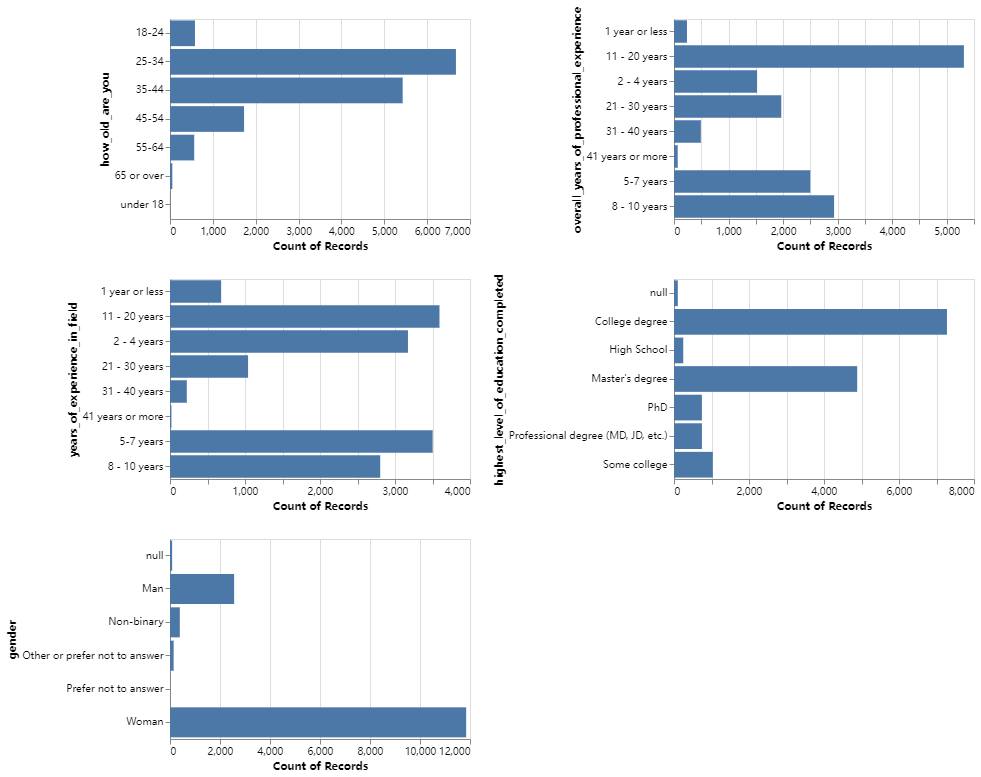

In [30]:
print("Figure 4")
alt.Chart(train_df).mark_bar().encode(
     y=alt.Y(alt.repeat(), type='nominal'),
     x='count()',
).properties(
    width=300,
    height=200
).repeat(
    collist,
    columns=2
)

Figure 5


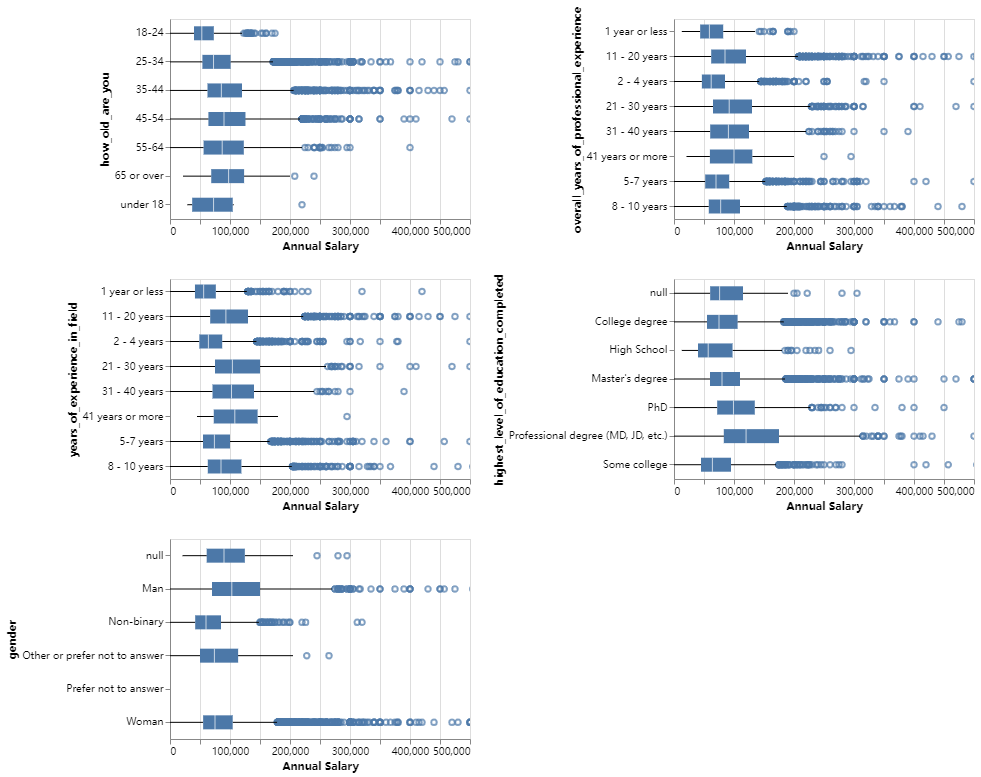

In [31]:
print("Figure 5")
alt.Chart(train_df).mark_boxplot(clip=True).encode(
    x=alt.X("annual_salary", scale=alt.Scale(domain=(0, 500000)), title="Annual Salary"),
    y=alt.Y(alt.repeat(), type='nominal', sort="x"),
).properties(
    width=300,
    height=200,
).repeat(
    collist,
    columns=2
)

- Looking at these boxplots is especially informative as to which factors have the strongest relationship with annual salary. 
- For example, it can be seen that older age groups tend to have salaries which are higher, with the 65 and over age group having the highest median salaries.
    - However, this should be taken in conjunction with the fact that this age group also has the fewest number of data points
    - This may be relevant when we perform modelling

Figure 6


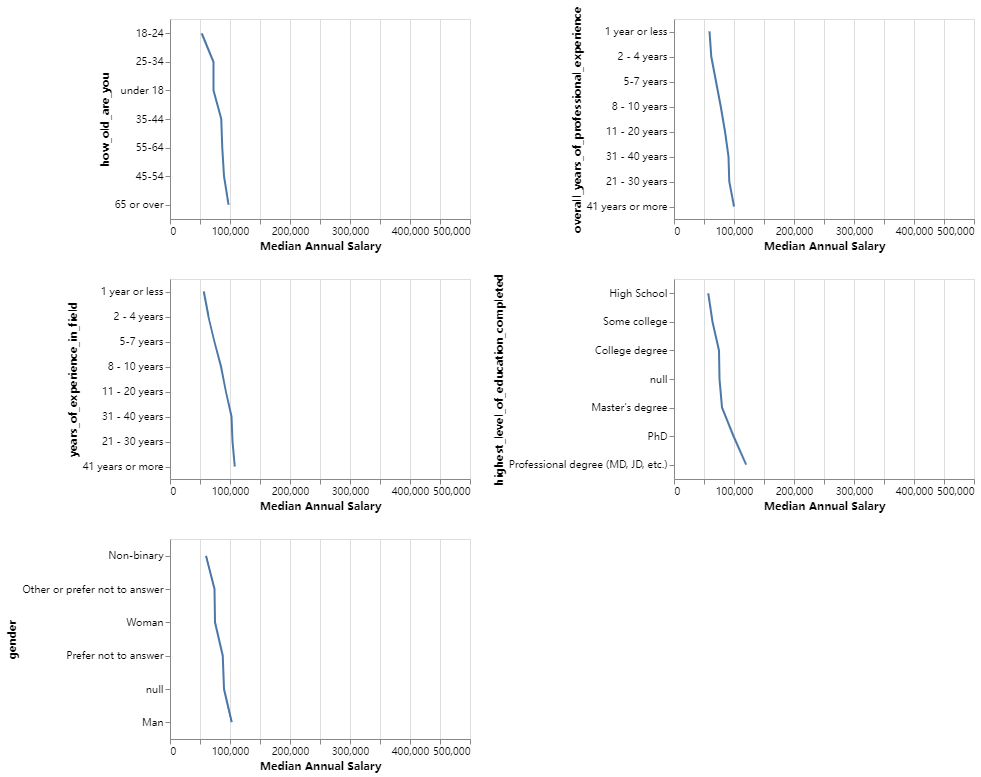

In [32]:
print("Figure 6")
alt.Chart(train_df).mark_line(clip=True).encode(
    x=alt.X("median(annual_salary)",scale=alt.Scale(domain=(0, 500000)), title = "Median Annual Salary"),
    y=alt.Y(alt.repeat(), type='ordinal',sort='x'),
).properties(
    width=300,
    height=200
).repeat(
    collist,
    columns=2
)

- There are clear correlations between those variables and salaries, and those seems to be good predictors of our target.

## Demographic Patterns

In [18]:
train_df['gender'].value_counts()

Woman                            11847
Man                               2565
Non-binary                         393
Other or prefer not to answer      146
Prefer not to answer                 1
Name: gender, dtype: int64

In [19]:
train_df['race'].value_counts()

White                                                                                                                            12580
Asian or Asian American                                                                                                            647
Black or African American                                                                                                          373
Hispanic, Latino, or Spanish origin                                                                                                318
Another option not listed here or prefer not to answer                                                                             279
Hispanic, Latino, or Spanish origin, White                                                                                         226
Asian or Asian American, White                                                                                                     193
Black or African American, White                       

- As mentioned previously, the dataset is poorly representative of the general population, and thus should not be treated as such
- From looking at the value counts of gender and race, it is clear that there is a over-representation of white and female individuals in the respondents to the survey
- We must also be cautious when including variables such as race and gender, because there may be consequential ethical results, especially when considering what use case such a predictive model may be employed for. 